In [1]:
from pysr import PySRRegressor
#import simpy as sp
import os
import yaml
import numpy as np

import json


#PATH = '/home/jpierre/v2/pySr/data/mod1/data.json'
#PATH_CFG = '/master/code/experimental/pysr/cfg_pysr'
PATH = '/home/jpierre/v2/pySr/data/normal/normal_action-None_dropout0_l1-0-lim1.json'

NB_RUN = 500
BINARY_OP = ["+", "*"]
UNARY_OP = ["inv(x) = 1/x"]
VARIABLES = ['v_x_0', 'v_y_0', 'v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'd', 'delta_x', 'delta_y', 'r_i', 'r_j']
MAX_SIZE = 11
PARSIMONY = 0.00032



def readJson(filePath:str):
    """
    Function to read json 
    """
    
    with open(filePath, 'r') as f:
        data = json.load(f)
    return data


def writeJson(data, filePath):
    """
    Function to write json 
    """
    with open(filePath, 'w') as f:
        json.dump(data, f, indent=2)


def getData(jsonPath = PATH):
    # for now


    messages = np.array(readJson(jsonPath)['messages'])
    edges = np.array(readJson(jsonPath)['edges'])[:, :3]

    return edges, messages



def getPySrModel(nbRun = NB_RUN, binaryOp = BINARY_OP, unaryOp = UNARY_OP, maxsize = MAX_SIZE):

    model = PySRRegressor(
        niterations=nbRun,
        binary_operators=binaryOp,
        #unary_operators= ["inv(x) = 1/x",],
        #populations=15,
        model_selection = "best",
        maxsize = maxsize,
        #complexity_of_variables = 2,
        #parsimony = PARSIMONY,
        #nested_constraints = {"cond": {"*":0}},
        #adaptive_parsimony_scaling = 1000,
        #ncycles_per_iteration = 1000,
        #turbo = True,
        #extra_sympy_mappings = {"inv": lambda x: 1 / x}
        #elementwise_loss = 'L1DistLoss()',
        weight_optimize  = 0.001,
        #denoise = True
    )

    return model


def fittingModel(model, X, y, verbose:bool = False, variables = VARIABLES):

    if verbose:
        print(">>>>> Fitting pySr")


    # Fit model
    model.fit(X, y, 
    variable_names = variables,
    # X_units = [""],
    # y_units = "",
    )


    return model

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
X, Y = getData()

In [3]:
print(X.shape)
print(Y.shape)

print(np.min(X[:, 0]))
print(np.max(X[:, 0]))

(40160, 3)
(40160, 2)
2.100020408630371
2.8998897075653076


In [4]:
print(np.min(Y))
print(np.max(Y))

-0.028178643435239792
0.028333701193332672


In [5]:
import random

inds = np.arange(X.shape[0])
random.shuffle(inds)

In [6]:
X = X[inds[:7500], :]
Y = Y[inds[:7500], :]

In [7]:
print(X.shape)

(7500, 3)


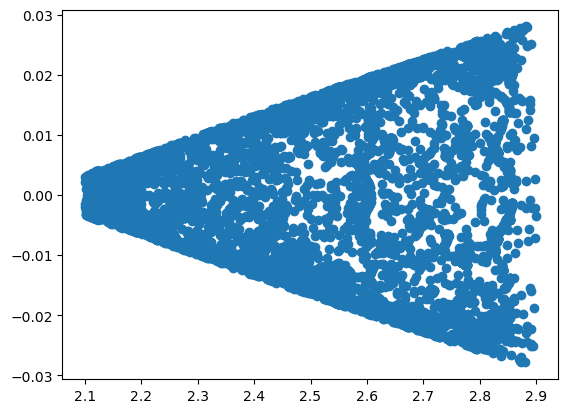

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], Y[:, 0])
plt.show()

In [9]:
print(X.shape)

(7500, 3)


In [10]:
pyReg = getPySrModel()

mod = fittingModel(pyReg, X, Y, variables=[' r ', ' cosine ', ' sine '])

/home/jpierre/anaconda3/envs/myenvPy/lib/python3.9/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/jpierre/anaconda3/envs/myenvPy/lib/python3.9/site-packages/pysr/sr.py:1441: UserWarning: Spaces in `variable_names` are not supported. Spaces have been replaced with underscores. 
Please use valid names instead.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 8.210e+03
Head worker occupation: 34.7%
Progress: 22 / 15000 total iterations (0.147%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           3.484e-05  5.314e+00  y₀ = 0.017492 * _cosine_
5           3.484e-05  5.690e-05  y₀ = (_cosine_ + 0.0035938) * 0.017493
7           2.304e-05  2.068e-01  y₀ = (_cosine_ * 0.0096031) * (_r_ + -0.62217)
9           1.879e-05  1.019e-01  y₀ = ((0.051717 * _cosine_) * 0.051717) * (_r_ * _r_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.492e-01  1.594e+01  y₁ = _sine_
3           3.849e-05  4.682e+00  y₁ = _sine_ * 0.017504
5     


Expressions evaluated per second: 2.050e+04
Head worker occupation: 10.4%
Progress: 246 / 15000 total iterations (1.640%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           3.484e-05  5.314e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.872e-05  1.510e-01  y₀ = (0.0027257 * _r_) * (_cosine_ * _r_)
9           1.237e-05  2.072e-01  y₀ = (_cosine_ * (0.027966 * 0.93541)) * (-1.8948 + _r_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.492e-01  1.594e+01  y₁ = _sine_
3           3.849e-05  4.682e+00  y₁ = _sine_ * 0.017504
5           


Expressions evaluated per second: 2.690e+04
Head worker occupation: 9.4%
Progress: 584 / 15000 total iterations (3.893%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.010e-01  1.594e+01  y₀ = -0.3176
3           3.484e-05  3.986e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.872e-05  1.510e-01  y₀ = (0.0027257 * _r_) * (_cosine_ * _r_)
9           1.237e-05  2.072e-01  y₀ = (_cosine_ * (0.027966 * 0.93541)) * (-1.8948 + _r_)
11          1.235e-05  1.001e-03  y₀ = ((0.1969 * (0.68005 * 0.19886)) * _cosine_) * (-1.8977 + ...
                                  _r_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
------------------------------------------------------------------------


Expressions evaluated per second: 2.540e+04
Head worker occupation: 7.9%
Progress: 912 / 15000 total iterations (6.080%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.010e-01  1.594e+01  y₀ = -0.3176
3           3.484e-05  3.986e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.237e-05  5.734e-02  y₀ = (_cosine_ * (0.027966 * 0.93541)) * (-1.8948 + _r_)
11          9.394e-06  1.376e-01  y₀ = 0.0027257 * (((_r_ * _cosine_) * _r_) + (-1.5934 * _sine_...
                                  ))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
-----------------------------------------------------------------------


Expressions evaluated per second: 2.150e+04
Head worker occupation: 8.5%
Progress: 1222 / 15000 total iterations (8.147%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.010e-01  1.594e+01  y₀ = -0.3176
3           3.484e-05  3.986e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.237e-05  5.734e-02  y₀ = (_cosine_ * (0.027966 * 0.93541)) * (-1.8948 + _r_)
11          9.386e-06  1.381e-01  y₀ = (((_cosine_ * _r_) * _r_) + (_sine_ * -1.6365)) * 0.00272...
                                  57
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------------------


Expressions evaluated per second: 1.920e+04
Head worker occupation: 8.7%
Progress: 1436 / 15000 total iterations (9.573%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.010e-01  1.594e+01  y₀ = -0.3176
3           3.484e-05  3.986e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.217e-05  6.537e-02  y₀ = (0.029914 * _cosine_) * (-0.77913 + (_r_ + -1.2035))
11          9.384e-06  1.301e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------


Expressions evaluated per second: 2.080e+04
Head worker occupation: 8.7%
Progress: 1672 / 15000 total iterations (11.147%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.010e-01  1.594e+01  y₀ = -0.3176
3           3.484e-05  3.986e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.217e-05  6.537e-02  y₀ = (0.029914 * _cosine_) * (-0.77913 + (_r_ + -1.2035))
11          9.384e-06  1.301e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
--------------------------------------------------------------------


Expressions evaluated per second: 2.160e+04
Head worker occupation: 8.7%
Progress: 2004 / 15000 total iterations (13.360%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.010e-01  1.594e+01  y₀ = -0.3176
3           3.484e-05  3.986e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.217e-05  6.537e-02  y₀ = (0.029914 * _cosine_) * (-0.77913 + (_r_ + -1.2035))
11          9.384e-06  1.301e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
--------------------------------------------------------------------


Expressions evaluated per second: 2.120e+04
Head worker occupation: 8.8%
Progress: 2378 / 15000 total iterations (15.853%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.437e-02  1.594e+01  y₀ = 0.30679
3           3.484e-05  3.952e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.215e-05  6.636e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          9.384e-06  1.291e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------


Expressions evaluated per second: 2.040e+04
Head worker occupation: 8.7%
Progress: 2602 / 15000 total iterations (17.347%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.437e-02  1.594e+01  y₀ = 0.30679
3           3.484e-05  3.952e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.215e-05  6.636e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          9.384e-06  1.291e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------


Expressions evaluated per second: 2.180e+04
Head worker occupation: 8.6%
Progress: 2890 / 15000 total iterations (19.267%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.437e-02  1.594e+01  y₀ = 0.30679
3           3.484e-05  3.952e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.010e-01  y₀ = (-1.7225 + _r_) * (_cosine_ * 0.021166)
9           1.215e-05  6.636e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          9.384e-06  1.291e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------


Expressions evaluated per second: 2.190e+04
Head worker occupation: 8.4%
Progress: 3185 / 15000 total iterations (21.233%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.437e-02  1.594e+01  y₀ = 0.30679
3           3.484e-05  3.952e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.013e-01  y₀ = (-1.7237 + _r_) * (_cosine_ * 0.021166)
9           1.215e-05  6.603e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          9.384e-06  1.291e-01  y₀ = (((_cosine_ * _r_) * _r_) + (-1.6396 * _sine_)) * 0.00273...
                                  27
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------


Expressions evaluated per second: 2.140e+04
Head worker occupation: 8.2%
Progress: 3467 / 15000 total iterations (23.113%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.437e-02  1.594e+01  y₀ = 0.30679
3           3.484e-05  3.952e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.387e-05  3.013e-01  y₀ = (-1.7237 + _r_) * (_cosine_ * 0.021166)
9           1.215e-05  6.603e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          8.751e-06  1.641e-01  y₀ = ((_r_ * _r_) * (_cosine_ + (-0.20489 * _sine_))) * 0.0027...
                                  327
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
--------------------------------------------------------------------


Expressions evaluated per second: 2.070e+04
Head worker occupation: 8.2%
Progress: 3746 / 15000 total iterations (24.973%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.437e-02  1.594e+01  y₀ = 0.30679
3           3.484e-05  3.952e+00  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.276e-05  3.430e-01  y₀ = (_cosine_ * 0.024401) * (-1.8384 + _r_)
9           1.215e-05  2.433e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          2.597e-06  7.715e-01  y₀ = (((-0.26569 * _sine_) + _cosine_) * 0.021166) * (-1.7237 ...
                                  + _r_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
-----------------------------------------------------------------


Expressions evaluated per second: 2.110e+04
Head worker occupation: 8.1%
Progress: 4026 / 15000 total iterations (26.840%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.4618e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.266e-05  3.469e-01  y₀ = (_cosine_ * 0.025709) * (-1.8604 + _r_)
9           1.215e-05  2.040e-02  y₀ = ((_r_ * (0.014302 * 2.0289)) + -0.05694) * _cosine_
11          2.597e-06  7.715e-01  y₀ = (((-0.2661 * _sine_) + _cosine_) * 0.021166) * (-1.7237 +...
                                   _r_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
--------------------------------------------------------------


Expressions evaluated per second: 2.280e+04
Head worker occupation: 8.3%
Progress: 4274 / 15000 total iterations (28.493%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          7.932e-08  1.258e+00  y₀ = (-2.0036 + _r_) * ((_cosine_ + (-0.28303 * _sine_)) * 0.0...
                                  31226)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.480e+04
Head worker occupation: 8.2%
Progress: 4607 / 15000 total iterations (30.713%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          7.932e-08  1.258e+00  y₀ = (-2.0036 + _r_) * ((_cosine_ + (-0.28303 * _sine_)) * 0.0...
                                  31226)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.080e+04
Head worker occupation: 8.2%
Progress: 4841 / 15000 total iterations (32.273%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          7.932e-08  1.258e+00  y₀ = (-2.0036 + _r_) * ((_cosine_ + (-0.28303 * _sine_)) * 0.0...
                                  31226)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.170e+04
Head worker occupation: 8.1%
Progress: 5081 / 15000 total iterations (33.873%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          7.932e-08  1.258e+00  y₀ = (-2.0036 + _r_) * ((_cosine_ + (-0.28303 * _sine_)) * 0.0...
                                  31226)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.120e+04
Head worker occupation: 8.2%
Progress: 5366 / 15000 total iterations (35.773%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          5.125e-08  1.367e+00  y₀ = (-1.9989 + _r_) * (((_sine_ * -0.26606) + _cosine_) * 0.0...
                                  30967)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.100e+04
Head worker occupation: 8.2%
Progress: 5641 / 15000 total iterations (37.607%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.742e-08  1.386e+00  y₀ = (-1.9989 + _r_) * (((_sine_ * -0.27205) + _cosine_) * 0.0...
                                  30967)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.140e+04
Head worker occupation: 8.2%
Progress: 5881 / 15000 total iterations (39.207%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.742e-08  1.386e+00  y₀ = (-1.9989 + _r_) * (((_sine_ * -0.27205) + _cosine_) * 0.0...
                                  30967)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.180e+04
Head worker occupation: 8.2%
Progress: 6127 / 15000 total iterations (40.847%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.742e-08  1.386e+00  y₀ = (-1.9989 + _r_) * (((_sine_ * -0.27205) + _cosine_) * 0.0...
                                  30967)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.250e+04
Head worker occupation: 8.3%
Progress: 6373 / 15000 total iterations (42.487%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.742e-08  1.386e+00  y₀ = (-1.9989 + _r_) * (((_sine_ * -0.27205) + _cosine_) * 0.0...
                                  30967)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.240e+04
Head worker occupation: 8.3%
Progress: 6664 / 15000 total iterations (44.427%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.380e+04
Head worker occupation: 8.3%
Progress: 6975 / 15000 total iterations (46.500%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.690e+04
Head worker occupation: 8.0%
Progress: 7398 / 15000 total iterations (49.320%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.500e+04
Head worker occupation: 8.1%
Progress: 7680 / 15000 total iterations (51.200%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.260e+04
Head worker occupation: 8.0%
Progress: 7987 / 15000 total iterations (53.247%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.190e+04
Head worker occupation: 7.9%
Progress: 8289 / 15000 total iterations (55.260%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.560e+04
Head worker occupation: 8.0%
Progress: 8577 / 15000 total iterations (57.180%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.250e+04
Head worker occupation: 8.1%
Progress: 8874 / 15000 total iterations (59.160%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.340e+04
Head worker occupation: 8.3%
Progress: 9248 / 15000 total iterations (61.653%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.450e+04
Head worker occupation: 8.3%
Progress: 9581 / 15000 total iterations (63.873%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.430e+04
Head worker occupation: 8.3%
Progress: 9850 / 15000 total iterations (65.667%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1        


Expressions evaluated per second: 2.390e+04
Head worker occupation: 8.4%
Progress: 10120 / 15000 total iterations (67.467%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
11          4.003e-08  1.429e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1       


Expressions evaluated per second: 2.370e+04
Head worker occupation: 8.5%
Progress: 10545 / 15000 total iterations (70.300%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.270e+04
Head worker occupation: 8.2%
Progress: 10857 / 15000 total iterations (72.380%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.320e+04
Head worker occupation: 8.6%
Progress: 11115 / 15000 total iterations (74.100%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.410e+04
Head worker occupation: 8.7%
Progress: 11439 / 15000 total iterations (76.260%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.270e+04
Head worker occupation: 8.6%
Progress: 11749 / 15000 total iterations (78.327%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.190e+04
Head worker occupation: 8.5%
Progress: 12085 / 15000 total iterations (80.567%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.240e+04
Head worker occupation: 8.5%
Progress: 12387 / 15000 total iterations (82.580%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.390e+04
Head worker occupation: 8.4%
Progress: 12763 / 15000 total iterations (85.087%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.650e+04
Head worker occupation: 8.4%
Progress: 13104 / 15000 total iterations (87.360%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.300e+04
Head worker occupation: 8.6%
Progress: 13471 / 15000 total iterations (89.807%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.430e+04
Head worker occupation: 8.7%
Progress: 13739 / 15000 total iterations (91.593%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.310e+04
Head worker occupation: 8.7%
Progress: 14050 / 15000 total iterations (93.667%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.520e+04
Head worker occupation: 8.6%
Progress: 14442 / 15000 total iterations (96.280%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.620e+04
Head worker occupation: 8.6%
Progress: 14721 / 15000 total iterations (98.140%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------


Expressions evaluated per second: 2.420e+04
Head worker occupation: 8.6%
Progress: 14998 / 15000 total iterations (99.987%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.984e-04  1.594e+01  y₀ = -9.6609e-05
3           3.484e-05  8.698e-01  y₀ = 0.017492 * _cosine_
5           2.533e-05  1.594e-01  y₀ = _cosine_ * (0.0069879 * _r_)
7           1.215e-05  3.673e-01  y₀ = ((_r_ * 0.029016) + -0.05694) * _cosine_
9           1.215e-05  5.889e-05  y₀ = ((0.0017845 + _cosine_) * 0.029038) * (-1.963 + _r_)
11          4.003e-08  2.858e+00  y₀ = (-1.9899 + _r_) * (((_sine_ * -0.27027) + _cosine_) * 0.0...
                                  30604)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------------------

In [11]:
print(mod.latex_table(indices=None, precision=3, columns=['equation', 'complexity', 'loss', 'score']))

\usepackage{breqn}
\usepackage{booktabs}

...

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midrule
$y_{0} = -9.66 \cdot 10^{-5}$ & $1$ & $0.000198$ & $0.0$ \\
$y_{0} = 0.0175 _cosine_{}$ & $3$ & $3.48 \cdot 10^{-5}$ & $0.870$ \\
$y_{0} = _cosine_{} 0.00699 _r_{}$ & $5$ & $2.53 \cdot 10^{-5}$ & $0.159$ \\
$y_{0} = _cosine_{} \left(_r_{} 0.0290 - 0.0569\right)$ & $7$ & $1.22 \cdot 10^{-5}$ & $0.367$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \left(_cosine_{} + 0.00178\right) 0.0290 \left(_r_{} - 1.96\right) \end{dmath*} \end{minipage} & $9$ & $1.21 \cdot 10^{-5}$ & $5.90 \cdot 10^{-5}$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \left(_r_{} - 1.99\right) \left(_cosine_{} + _sine_{} \left(-0.270\right)\right) 0.0306 \end{dmath*} \end{minipage} & $11$ & $4.00 \cdot 10^{-8}$ & $2.86$ \\
\bottomrule
\end{tabular}
\end{center}
\end{table}

\begin{table}[h]
\begin{center}


In [12]:
print(mod.sympy())

[(_r_ - 1.9898673)*(_cosine_ + _sine_*(-0.27027434))*0.030604333, (_cosine_ + 3.7376354*_sine_)*0.00807126*(_r_ - 1.9880081)]
